In [8]:
from google.colab import drive

In [9]:
import pandas as pd

path = "/content/drive/MyDrive/abalone.xlsx"
df = pd.read_excel(path)

In [10]:
#load the dataset

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

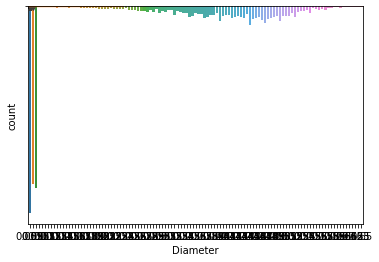

In [13]:
import seaborn as sns
import numpy as np
import pandas as pd

### Univariate analysis

sns.distplot(df.Length) # numeric
sns.boxplot(df.Height) # numeric
sns.distplot(df.Rings)
sns.countplot(df.Sex) # categorical
sns.countplot(df.Diameter)

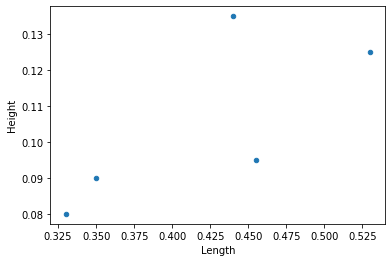

In [57]:
## Bivariate analysis

df.plot.scatter('Length','Height')

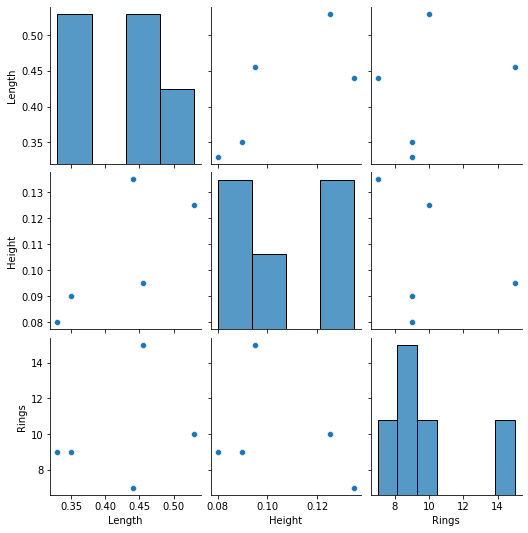

In [46]:
## Multivariate analysis

sns.pairplot(df)

In [68]:
df.shape

(5, 4)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Length  5 non-null      float64
 1   Height  5 non-null      float64
 2   Rings   5 non-null      int64  
 3   Sex     5 non-null      object 
dtypes: float64(2), int64(1), object(1)
memory usage: 288.0+ bytes


In [70]:
df.isnull().any()

Length    False
Height    False
Rings     False
Sex       False
dtype: bool

In [61]:
df.describe()

,Length,Height,Rings
count,5.000000,5.000000,5.0
mean,0.421000,0.105000,10.0
std,0.081731,0.023717,3.0
min,0.330000,0.080000,7.0
25%,0.350000,0.090000,9.0
50%,0.440000,0.095000,9.0
75%,0.455000,0.125000,10.0
max,0.530000,0.135000,15.0


In [52]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length    0.440
Height    0.095
Rings     9.000
dtype: float64

In [60]:
df.Sex.value_counts()

M    3
F    1
I    1
Name: Sex, dtype: int64

In [64]:
df.Rings.value_counts()

9     2
15    1
7     1
10    1
Name: Rings, dtype: int64

In [73]:
df.Height.value_counts()

0.095    1
0.090    1
0.135    1
0.125    1
0.080    1
Name: Height, dtype: int64

In [74]:
df.Length.value_counts()

0.455    1
0.350    1
0.440    1
0.530    1
0.330    1
Name: Length, dtype: int64

In [76]:

median = df.loc[df['Length']<0.2, 'Length'].median()
df.loc[df.Length > 0.5, 'Length'] = np.nan
df.fillna(median,inplace=True)


df["Length"] = np.where(df["Length"] >0.2, median,df['Length'])


df["Length"] = df["Length"].mask(df["Length"] >0.2, median)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


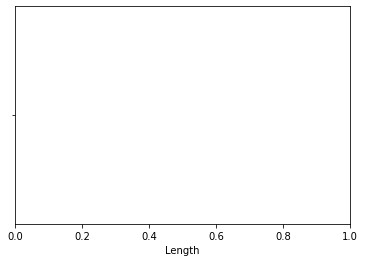

In [77]:
sns.boxplot(df.Length)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
outliers=[]
def detect_outliers(data):
  threshold=3
  mean=np.mean(data)
  std=np.std(data)
  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers   
  outlier_pt=detect_outliers(path)
  outlier_pt

In [80]:
import pandas as pd
s = pd.Series(list('Length'))
pd.get_dummies(s)

,L,e,g,h,n,t
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0


In [84]:
import pandas as pd
        
df = pd.DataFrame({
          'Sex':['M','F','I'],
          'Rings':[10,9,15]
        })
df

,Sex,Rings
0,M,10
1,F,9
2,I,15


In [85]:
# Get one hot encoding of columns Rings

one_hot = pd.get_dummies(df['Rings'])

# Drop column Rings as it is now encoded

df = df.drop('Rings',axis = 1)

# Join the encoded df

df = df.join(one_hot)
df  

,Sex,9,10,15
0,M,0,1,0
1,F,1,0,0
2,I,0,0,1


In [87]:
import pandas as pd

path = "/content/drive/MyDrive/abalone.xlsx"
df = pd.read_excel(path)
df.head()
df_tips=pd.get_dummies(df)
df_tips

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
path = "/content/drive/MyDrive/abalone.xlsx"
df = pd.read_excel(path)
x=df.iloc[:,1:5]
y=df.iloc[:,5]
print(df.describe())

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [91]:
x=df.iloc[:,1:14]
print(df.describe())

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [94]:
x_train.shape

(3132, 8)

In [95]:
y_train.shape

(3132,)

In [96]:
x_test.shape

(1045, 8)

In [97]:
y_test.shape

(1045,)